# F1 Telemetry functions

## Examples

req         WARNING 	DEFAULT CACHE ENABLED! (332.14 MB) /home/michail/.cache/fastf1
core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data.

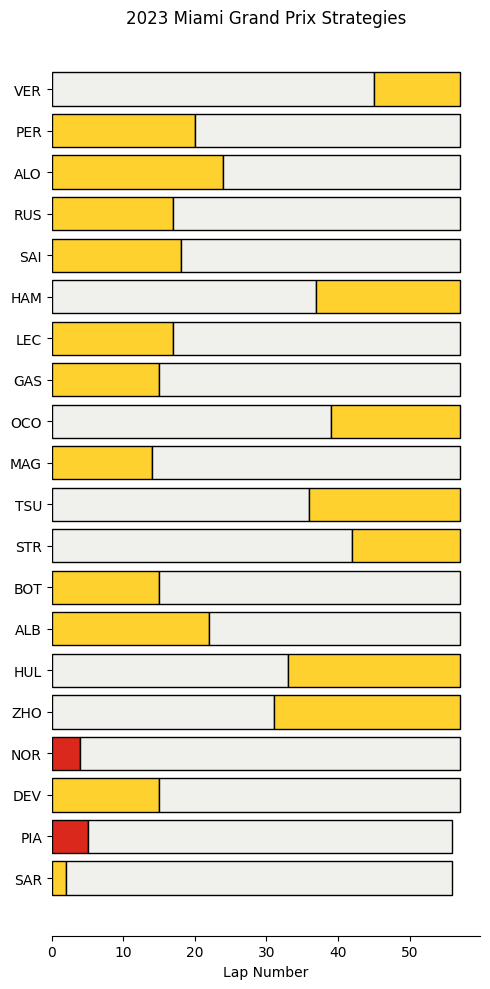

In [2]:
"""
Tyre strategies during a race
=============================

Plot all drivers' tyre strategies during a race.
"""

from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


###############################################################################
# Load the race session

session = fastf1.get_session(2023, "Miami", 'R')
session.load()
laps = session.laps

###############################################################################
# Get the list of driver numbers
drivers = session.drivers
# print(drivers)

###############################################################################
# Convert the driver numbers to three letter abbreviations
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
# print(drivers)

###############################################################################
# We need to find the stint length and compound used
# for every stint by every driver.
# We do this by first grouping the laps by the driver,
# the stint number, and the compound.
# And then counting the number of laps in each group.
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

###############################################################################
# The number in the LapNumber column now stands for the number of observations
# in that group aka the stint length.
stints = stints.rename(columns={"LapNumber": "StintLength"})
# print(stints)

###############################################################################
# Now we can plot the strategies for each driver
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more readable and intuitive
plt.title("2023 Miami Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

# sphinx_gallery_defer_figures

###############################################################################
# Plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


req         WARNING 	DEFAULT CACHE ENABLED! (440.49 MB) /home/michail/.cache/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2'

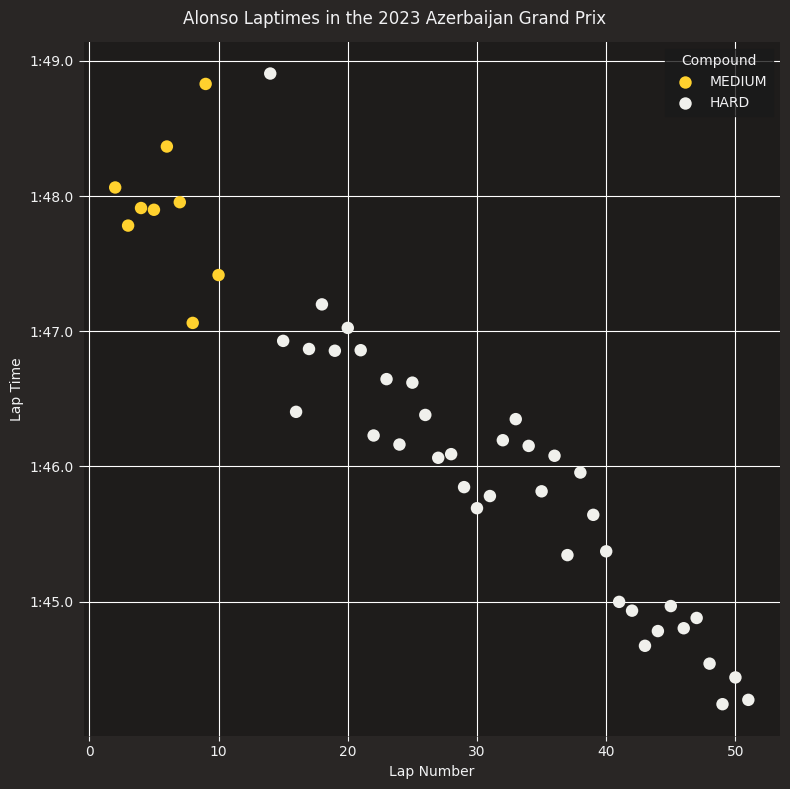

In [1]:
"""Driver Laptimes Scatterplot
==============================

Plot a driver's lap times in a race, with color coding for the compounds.
"""

import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.

race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

###############################################################################
# Get all the laps for a single driver.
# Filter out slow laps as they distort the graph axis.

driver_laps = race.laps.pick_drivers(["ALO"]).pick_quicklaps().reset_index()

###############################################################################
# Make the scattterplot using lap number as x-axis and lap time as y-axis.
# Marker colors correspond to the compounds used.
# Note: as LapTime is represented by timedelta, calling setup_mpl earlier
# is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')
# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more aesthetic.
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']
req            INFO 	Using cached data for driver_info


['11', '1', '16', '14', '55', '44', '18', '63', '4', '22']
['PER', 'VER', 'LEC', 'ALO', 'SAI', 'HAM', 'STR', 'RUS', 'NOR', 'TSU']


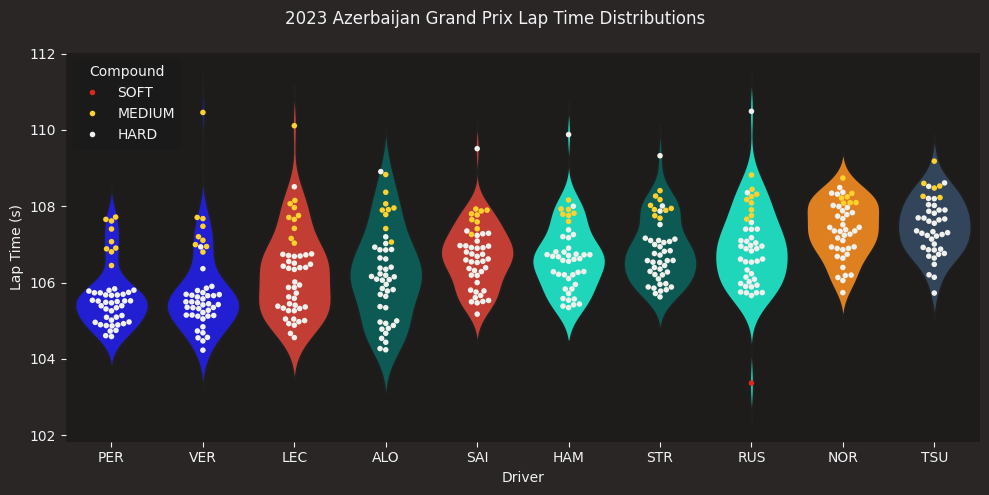

In [2]:
"""Driver Laptimes Distribution Visualization
=============================================
Visualizae different drivers' laptime distributions.
"""

import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session

race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

###############################################################################
# Get all the laps for the point finishers only.
# Filter out slow laps (yellow flag, VSC, pitstops etc.)
# as they distort the graph axis.
point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

###############################################################################
# To plot the drivers by finishing order,
# we need to get their three-letter abbreviations in the finishing order.
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

###############################################################################
# First create the violin plots to show the distributions.
# Then use the swarm plot to show the actual laptimes.

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support,
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=fastf1.plotting.get_driver_color_mapping(session=race)
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=race),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )
# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more aesthetic
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2023 Azerbaijan Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [6]:
driver_laps

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime(s)
0,0,0 days 01:04:52.482000,VER,1,0 days 00:01:50.456000,1.0,1.0,NaT,NaT,NaT,...,Red Bull Racing,0 days 01:03:01.758000,2023-04-30 11:04:03.228,12,2.0,False,,False,False,110.456
1,1,0 days 01:06:40.189000,VER,1,0 days 00:01:47.707000,2.0,1.0,NaT,NaT,0 days 00:00:38.431000,...,Red Bull Racing,0 days 01:04:52.482000,2023-04-30 11:05:53.952,1,2.0,False,,False,True,107.707
2,2,0 days 01:08:27.866000,VER,1,0 days 00:01:47.677000,3.0,1.0,NaT,NaT,0 days 00:00:38.493000,...,Red Bull Racing,0 days 01:06:40.189000,2023-04-30 11:07:41.659,1,1.0,False,,False,True,107.677
3,3,0 days 01:10:14.974000,VER,1,0 days 00:01:47.108000,4.0,1.0,NaT,NaT,0 days 00:00:37.933000,...,Red Bull Racing,0 days 01:08:27.866000,2023-04-30 11:09:29.336,1,1.0,False,,False,True,107.108
4,4,0 days 01:12:02.450000,VER,1,0 days 00:01:47.476000,5.0,1.0,NaT,NaT,0 days 00:00:38.284000,...,Red Bull Racing,0 days 01:10:14.974000,2023-04-30 11:11:16.444,1,1.0,False,,False,True,107.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,854,0 days 02:26:01.234000,RUS,63,0 days 00:01:45.740000,45.0,2.0,NaT,NaT,0 days 00:00:37.493000,...,Mercedes,0 days 02:24:15.494000,2023-04-30 12:25:16.964,1,8.0,False,,False,True,105.740
456,855,0 days 02:27:46.987000,RUS,63,0 days 00:01:45.753000,46.0,2.0,NaT,NaT,0 days 00:00:37.431000,...,Mercedes,0 days 02:26:01.234000,2023-04-30 12:27:02.704,1,8.0,False,,False,True,105.753
457,856,0 days 02:29:32.649000,RUS,63,0 days 00:01:45.662000,47.0,2.0,NaT,NaT,0 days 00:00:37.423000,...,Mercedes,0 days 02:27:46.987000,2023-04-30 12:28:48.457,1,8.0,False,,False,True,105.662
458,857,0 days 02:31:18.383000,RUS,63,0 days 00:01:45.734000,48.0,2.0,NaT,NaT,0 days 00:00:37.494000,...,Mercedes,0 days 02:29:32.649000,2023-04-30 12:30:34.119,1,8.0,False,,False,True,105.734


core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '55', '44', '14', '4', '22', '18', '81', '63', '31', '23', '77', '2', '24', '27', '20', '10', '21']
/home/michail/miniconda3/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is 

['LEC' 'VER' 'PER' 'SAI' 'HAM' 'ALO' 'NOR' 'TSU' 'STR' 'PIA' 'RUS' 'OCO'
 'ALB' 'BOT' 'SAR' 'ZHO' 'HUL' 'MAG' 'GAS' 'DEV']
   Driver                LapTime           LapTimeDelta
0     LEC 0 days 00:01:40.203000        0 days 00:00:00
1     VER 0 days 00:01:40.391000 0 days 00:00:00.188000
2     PER 0 days 00:01:40.495000 0 days 00:00:00.292000
3     SAI 0 days 00:01:41.016000 0 days 00:00:00.813000
4     HAM 0 days 00:01:41.177000 0 days 00:00:00.974000
5     ALO 0 days 00:01:41.253000 0 days 00:00:01.050000
6     NOR 0 days 00:01:41.281000 0 days 00:00:01.078000
7     TSU 0 days 00:01:41.569000 0 days 00:00:01.366000
8     STR 0 days 00:01:41.576000 0 days 00:00:01.373000
9     PIA 0 days 00:01:41.611000 0 days 00:00:01.408000
10    RUS 0 days 00:01:41.654000 0 days 00:00:01.451000
11    OCO 0 days 00:01:41.798000 0 days 00:00:01.595000
12    ALB 0 days 00:01:41.818000 0 days 00:00:01.615000
13    SAR 0 days 00:01:42.242000 0 days 00:00:02.039000
14    BOT 0 days 00:01:42.259000 0 da

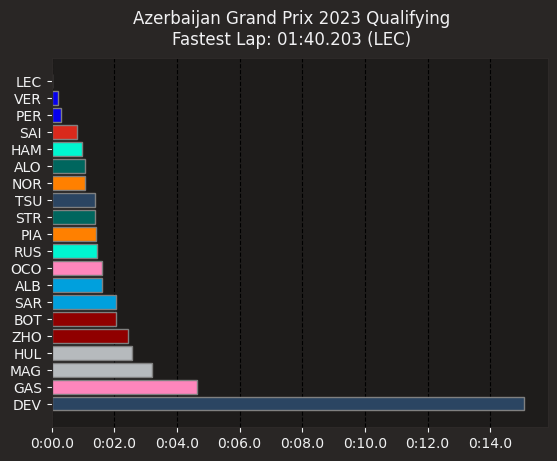

In [5]:
"""Qualifying results overview
==============================

Plot the qualifying result with visualization the fastest times.
"""


import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme=None)


session = fastf1.get_session(2023, "Azerbaijan", 'Q')
session.load()


##############################################################################
# First, we need to get an array of all drivers.

drivers = pd.unique(session.laps['Driver'])
print(drivers)


##############################################################################
# After that we'll get each driver's fastest lap, create a new laps object
# from these laps, sort them by lap time and have pandas reindex them to
# number them nicely by starting position.

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)


##############################################################################
# The plot is nicer to look at and more easily understandable if we just plot
# the time differences. Therefore, we subtract the fastest lap time from all
# other lap times.

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']


##############################################################################
# We can take a quick look at the laps we have to check if everything
# looks all right. For this, we'll just check the 'Driver', 'LapTime'
# and 'LapTimeDelta' columns.

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])


##############################################################################
# Finally, we'll create a list of team colors per lap to color our plot.
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)


##############################################################################
# Now, we can plot all the data
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
# sphinx_gallery_defer_figures


##############################################################################
# Finally, give the plot a meaningful title

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.plot()

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

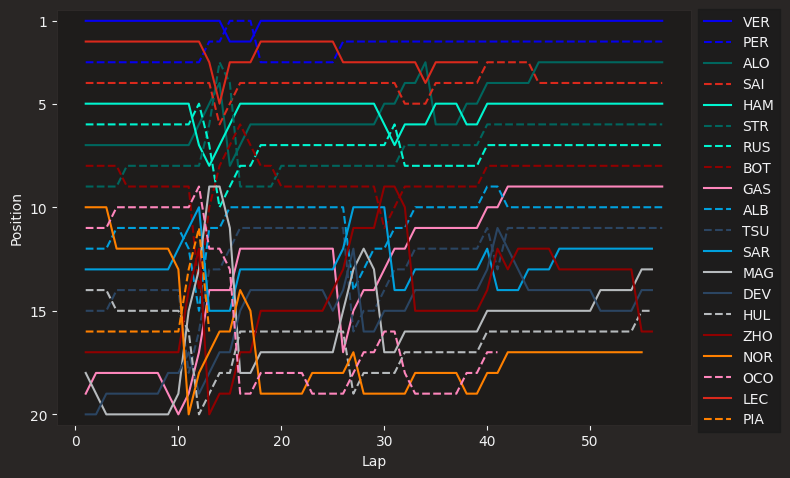

In [7]:
"""
Position changes during a race
==============================

Plot the position of each driver at the end of each lap.
"""

import matplotlib.pyplot as plt

import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')


##############################################################################
# Load the session and create the plot
session = fastf1.get_session(2023, 1, 'R')
session.load(telemetry=False, weather=False)

fig, ax = plt.subplots(figsize=(8.0, 4.9))
# sphinx_gallery_defer_figures

##############################################################################
# For each driver, get their three letter abbreviation (e.g. 'HAM') by simply
# using the value of the first lap, get their color and then plot their
# position over the number of laps.
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)
# sphinx_gallery_defer_figures

##############################################################################
# Finalize the plot by setting y-limits that invert the y-axis so that position
# one is at the top, set custom tick positions and axis labels.
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
# sphinx_gallery_defer_figures

##############################################################################
# Because this plot is very crowed, add the legend outside the plot area.
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

In [8]:
drv_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1043,0 days 01:04:25.156000,PIA,81,0 days 00:01:48.214000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:45.783000,...,True,McLaren,0 days 01:02:36.652000,NaT,12,16.0,False,,False,False
1044,0 days 01:06:05.986000,PIA,81,0 days 00:01:40.830000,2.0,1.0,NaT,NaT,0 days 00:00:32.185000,0 days 00:00:43.977000,...,True,McLaren,0 days 01:04:25.156000,NaT,21,16.0,False,,False,True
1045,0 days 01:07:46.677000,PIA,81,0 days 00:01:40.691000,3.0,1.0,NaT,NaT,0 days 00:00:31.877000,0 days 00:00:43.986000,...,True,McLaren,0 days 01:06:05.986000,NaT,1,16.0,False,,False,True
1046,0 days 01:09:27.395000,PIA,81,0 days 00:01:40.718000,4.0,1.0,NaT,NaT,0 days 00:00:31.831000,0 days 00:00:44.079000,...,True,McLaren,0 days 01:07:46.677000,NaT,1,16.0,False,,False,True
1047,0 days 01:11:08.257000,PIA,81,0 days 00:01:40.862000,5.0,1.0,NaT,NaT,0 days 00:00:31.846000,0 days 00:00:44.060000,...,True,McLaren,0 days 01:09:27.395000,NaT,1,16.0,False,,False,True
1048,0 days 01:12:49.368000,PIA,81,0 days 00:01:41.111000,6.0,1.0,NaT,NaT,0 days 00:00:31.694000,0 days 00:00:44.425000,...,True,McLaren,0 days 01:11:08.257000,NaT,1,16.0,False,,False,True
1049,0 days 01:14:30.535000,PIA,81,0 days 00:01:41.167000,7.0,1.0,NaT,NaT,0 days 00:00:31.716000,0 days 00:00:44.471000,...,True,McLaren,0 days 01:12:49.368000,NaT,1,16.0,False,,False,True
1050,0 days 01:16:11.830000,PIA,81,0 days 00:01:41.295000,8.0,1.0,NaT,NaT,0 days 00:00:31.665000,0 days 00:00:44.590000,...,True,McLaren,0 days 01:14:30.535000,NaT,1,16.0,False,,False,True
1051,0 days 01:17:53.364000,PIA,81,0 days 00:01:41.534000,9.0,1.0,NaT,NaT,0 days 00:00:31.989000,0 days 00:00:44.548000,...,True,McLaren,0 days 01:16:11.830000,NaT,1,16.0,False,,False,True
1052,0 days 01:19:34.948000,PIA,81,0 days 00:01:41.584000,10.0,1.0,NaT,NaT,0 days 00:00:31.779000,0 days 00:00:44.617000,...,True,McLaren,0 days 01:17:53.364000,NaT,1,16.0,False,,False,True
